In [1]:
from transformers import pipeline
from nltk import sent_tokenize


d:\DataScience\DeepLearning\NLP_TV_Series_Project\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import nltk
import torch

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thota\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [5]:
# pose sequence as a NLI premise and label as a hypothesis
from transformers import AutoModelForSequenceClassification, AutoTokenizer
nli_model = AutoModelForSequenceClassification.from_pretrained('facebook/bart-large-mnli')
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large-mnli')
sequence_to_classify = "one day I will see the world"
premise = sequence_to_classify
candidate_labels = ['travel', 'cooking', 'dancing']
hypothesis = f'This example is {candidate_labels[0]}.'

# run through model pre-trained on MNLI
x = tokenizer.encode(premise, hypothesis, return_tensors='pt',
                     truncation_strategy='only_first')
logits = nli_model(x)[0]

# we throw away "neutral" (dim 1) and take the probability of
# "entailment" (2) as the probability of the label being true 
entail_contradiction_logits = logits[:,[0,2]]
probs = entail_contradiction_logits.softmax(dim=1)
prob_label_is_true = probs[:,1]


d:\DataScience\DeepLearning\NLP_TV_Series_Project\venv\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\thota\.cache\huggingface\hub\models--facebook--bart-large-mnli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
d:\DataScience\DeepLearning\NLP_TV_Series_Project\venv\lib\site-packages\transformers\tok

In [12]:
probs

tensor([[0.0055, 0.9945]], grad_fn=<SoftmaxBackward0>)

In [10]:
def load_model():
    theme_classifier = pipeline(
        'zero-shot-classification',
        model='facebook/bart-large-mnli'
    )
    return theme_classifier

In [13]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

RuntimeError: Failed to import transformers.models.bart.modeling_tf_bart because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.

In [4]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

d:\DataScience\DeepLearning\NLP_TV_Series_Project\venv\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [26]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-mnli")
model = AutoModelForSequenceClassification.from_pretrained("facebook/bart-large-mnli")

d:\DataScience\DeepLearning\NLP_TV_Series_Project\venv\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [27]:
sequence_to_classify = "one day I will see the world"
candidate_labels = ['travel', 'cooking', 'dancing']
pipe(sequence_to_classify, candidate_labels)

{'sequence': 'one day I will see the world',
 'labels': ['travel', 'dancing', 'cooking'],
 'scores': [0.9938651919364929, 0.0032738028094172478, 0.002861030399799347]}

In [6]:
# Load Dataset
from glob import glob
files = glob('data/Subtitles/*.ass')
files[:5]

['data/Subtitles\\Naruto Season 1 - 01.ass',
 'data/Subtitles\\Naruto Season 1 - 02.ass',
 'data/Subtitles\\Naruto Season 1 - 03.ass',
 'data/Subtitles\\Naruto Season 1 - 04.ass',
 'data/Subtitles\\Naruto Season 1 - 05.ass']

In [7]:
with open (files[0], 'r') as f:
    lines = f.readlines()
    lines = lines[27:]
    lines = [','.join(line.split(',')[9:]) for line in lines]

In [8]:
lines[:2]

['A long time ago, a powerful demon fox\\Nappeared with nine tails.\n',
 'With its powerful tails,\n']

In [9]:
int(files[0].split('-')[-1].split('.')[0].strip())

1

In [10]:
import pandas as pd 

In [18]:
def load_subtitles_dataset(dataset_path):
    subtitles_path = glob('data/Subtitles/*.ass')
    scripts = []
    episode_num = []
    for path in subtitles_path:
        # Read Lines
        with open (path, 'r', encoding="utf8") as f:
            lines = f.readlines()
            lines = lines[27:]
            lines = [','.join(line.split(',')[9:]) for line in lines]
        lines = [line.replace('\\N',' ') for line in lines]
        script = " ".join(lines)

        episode = int(path.split('-')[-1].split('.')[0].strip())
        scripts.append(script)
        episode_num.append(episode)

    df = pd.DataFrame.from_dict({"episode":episode_num, "script": scripts})
    return df

In [19]:
dataset_path = 'data/Subtitles/'
df = load_subtitles_dataset(dataset_path)
df.head()

,episode,script
0,1,"A long time ago, a powerful demon fox appeared..."
1,2,"C'mon!\n Running like a fugitive,\n Being chas..."
2,3,"C'mon!\n Running like a fugitive,\n Being chas..."
3,4,"C'mon!\n Running like a fugitive,\n Being chas..."
4,5,"C'mon!\n Running like a fugitive,\n Being chas..."


In [39]:
df['episode'].dropna(inplace=True)

In [101]:
df['script']

0    A long time ago, a powerful demon fox appeared...
1    C'mon!\n Running like a fugitive,\n Being chas...
Name: script, dtype: object

In [60]:
## Run Model
script = df.iloc[0]
script[1]

C:\Users\thota\AppData\Local\Temp\ipykernel_14572\2711167983.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  script[1]


'A long time ago, a powerful demon fox appeared with nine tails.\n With its powerful tails,\n it could smash mountains and create tidal waves.\n A band of Ninjas rose to defend their village from attack.\n We have to wait until the Fourth Hokage gets here!\n We can\'t let it get any closer to our village!\n One great Ninja was able to imprison the monster,\n but died in the process.\n This Ninja was known as… the Fourth Hokage.\n Naruto!\n Why did you do such a thing?!\n You\'re really gonna get it this time!\n I don\'t care!\n You know your problem?\n You can\'t do the things I do!\n Only I can do this!\n I\'m better than all of you! Believe it!\n There\'s a problem, sir!\n Lord Hokage!\n What is it?\n Did that Naruto do something again?\n Yes. He climbed onto the Mountainside Images…\n And he vandalized and graffitied all over them!\n Wait!\n Ha ha…\n Why should I?\n Hey, Naruto!\n How did you suddenly get here, lruka Sensei?\n The question is what are you doing here when you should 

In [105]:
from nltk import sent_tokenize
script_sentences = sent_tokenize(script[1])
script_sentences[:3]

['A long time ago, a powerful demon fox appeared with nine tails.',
 'With its powerful tails,\n it could smash mountains and create tidal waves.',
 'A band of Ninjas rose to defend their village from attack.']

In [62]:
# Batch Sentence
sentence_batch_size = 20
script_btaches=[]
for index in range(0, len(script_sentences), sentence_batch_size):
    sent = " ".join(script_sentences[index:index+sentence_batch_size])
    script_btaches.append(sent)

In [63]:
script_btaches[:2]

["A long time ago, a powerful demon fox appeared with nine tails. With its powerful tails,\n it could smash mountains and create tidal waves. A band of Ninjas rose to defend their village from attack. We have to wait until the Fourth Hokage gets here! We can't let it get any closer to our village! One great Ninja was able to imprison the monster,\n but died in the process. This Ninja was known as… the Fourth Hokage. Naruto! Why did you do such a thing?! You're really gonna get it this time! I don't care! You know your problem? You can't do the things I do! Only I can do this! I'm better than all of you! Believe it! There's a problem, sir! Lord Hokage! What is it? Did that Naruto do something again?",
 'Yes. He climbed onto the Mountainside Images…\n And he vandalized and graffitied all over them! Wait! Ha ha…\n Why should I? Hey, Naruto! How did you suddenly get here, lruka Sensei? The question is what are you doing here when you should be in class now? Now listen, Naruto. You failed t

In [71]:
theme_list=['battle','love','friendhip','hate','happy','sacrifice','self development','betrayal','dialogue']

In [74]:
pipe_out = pipe(
    script_btaches[:2],
    theme_list,
    multi_label=True
)

d:\DataScience\DeepLearning\NLP_TV_Series_Project\venv\lib\site-packages\torch\utils\data\dataloader.py:641: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x000001499D51B130> was reported to be 2(when accessing len(dataloader)), but 3 samples have been fetched. 
  warnings.warn(warn_msg)
d:\DataScience\DeepLearning\NLP_TV_Series_Project\venv\lib\site-packages\torch\utils\data\dataloader.py:641: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x000001499D51B130> was reported to be 2(when accessing len(dataloader)), but 4 samples have been fetched. 
  warnings.warn(warn_msg)
d:\DataScience\DeepLearning\NLP_TV_Series_Project\venv\lib\site-packages\torch\utils\data\dataloader.py:641: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x000001499D51B130> was reported to be 2(when accessing len(dataloader)), but 5 samples have 

In [75]:
pipe_out

[{'sequence': "A long time ago, a powerful demon fox appeared with nine tails. With its powerful tails,\n it could smash mountains and create tidal waves. A band of Ninjas rose to defend their village from attack. We have to wait until the Fourth Hokage gets here! We can't let it get any closer to our village! One great Ninja was able to imprison the monster,\n but died in the process. This Ninja was known as… the Fourth Hokage. Naruto! Why did you do such a thing?! You're really gonna get it this time! I don't care! You know your problem? You can't do the things I do! Only I can do this! I'm better than all of you! Believe it! There's a problem, sir! Lord Hokage! What is it? Did that Naruto do something again?",
  'labels': ['dialogue',
   'betrayal',
   'battle',
   'sacrifice',
   'self development',
   'friendhip',
   'hate',
   'happy',
   'love'],
  'scores': [0.9800741672515869,
   0.939690351486206,
   0.8546885251998901,
   0.7349815964698792,
   0.728497326374054,
   0.567444

In [76]:
themes= {}
for output in pipe_out:
    for label,score in zip(output['labels'], output['scores']):
        if label not in themes:
            themes[label] = []
        themes[label].append(score)

In [77]:
themes

{'dialogue': [0.9800741672515869, 0.9370126724243164],
 'betrayal': [0.939690351486206, 0.6457260847091675],
 'battle': [0.8546885251998901, 0.6581321954727173],
 'sacrifice': [0.7349815964698792, 0.6258837580680847],
 'self development': [0.728497326374054, 0.8678210973739624],
 'friendhip': [0.567444384098053, 0.42257246375083923],
 'hate': [0.2801382541656494, 0.1983579695224762],
 'happy': [0.06682592630386353, 0.08490363508462906],
 'love': [0.040261901915073395, 0.02802049182355404]}

In [78]:
import numpy as np

In [81]:
def get_themes_inference(script):
    script_sentences = sent_tokenize(script)

    #Batch Sentence
    sentence_batch_size = 20
    script_btaches=[]
    for index in range(0, len(script_sentences), sentence_batch_size):
        sent = " ".join(script_sentences[index:index+sentence_batch_size])
        script_btaches.append(sent)
    # Run Model
    theme_out = pipe(
        script_btaches[:2],
        theme_list,
        multi_label=True
    )
    # Wrangle output
    themes= {}
    for output in pipe_out:
        for label,score in zip(output['labels'], output['scores']):
            if label not in themes:
                themes[label] = []
            themes[label].append(score)   
    themes = {key: np.mean(np.array(val)) for key,val in themes.items()}
    return themes          

In [79]:
themes = {key: np.mean(np.array(val)) for key,val in themes.items()}

In [80]:
themes

{'dialogue': 0.9585434198379517,
 'betrayal': 0.7927082180976868,
 'battle': 0.7564103603363037,
 'sacrifice': 0.6804326772689819,
 'self development': 0.7981592118740082,
 'friendhip': 0.4950084239244461,
 'hate': 0.2392481118440628,
 'happy': 0.07586478069424629,
 'love': 0.03414119686931372}

In [82]:
df = df.head(2)

In [83]:
df

,episode,script
0,1,"A long time ago, a powerful demon fox appeared..."
1,2,"C'mon!\n Running like a fugitive,\n Being chas..."


In [85]:
output_themes = df['script'].apply(get_themes_inference)

d:\DataScience\DeepLearning\NLP_TV_Series_Project\venv\lib\site-packages\torch\utils\data\dataloader.py:641: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x000001499D477610> was reported to be 2(when accessing len(dataloader)), but 3 samples have been fetched. 
  warnings.warn(warn_msg)
d:\DataScience\DeepLearning\NLP_TV_Series_Project\venv\lib\site-packages\torch\utils\data\dataloader.py:641: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x000001499D477610> was reported to be 2(when accessing len(dataloader)), but 4 samples have been fetched. 
  warnings.warn(warn_msg)
d:\DataScience\DeepLearning\NLP_TV_Series_Project\venv\lib\site-packages\torch\utils\data\dataloader.py:641: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x000001499D477610> was reported to be 2(when accessing len(dataloader)), but 5 samples have 

In [86]:
output_themes

0    {'dialogue': 0.9585434198379517, 'betrayal': 0...
1    {'dialogue': 0.9585434198379517, 'betrayal': 0...
Name: script, dtype: object

In [88]:
theme_df = pd.DataFrame(output_themes.to_list())


In [89]:
theme_df

,dialogue,betrayal,battle,sacrifice,self development,friendhip,hate,happy,love
0,0.958543,0.792708,0.75641,0.680433,0.798159,0.495008,0.239248,0.075865,0.034141
1,0.958543,0.792708,0.75641,0.680433,0.798159,0.495008,0.239248,0.075865,0.034141


In [90]:
df[theme_df.columns] = theme_df
df

C:\Users\thota\AppData\Local\Temp\ipykernel_14572\3417989627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[theme_df.columns] = theme_df
C:\Users\thota\AppData\Local\Temp\ipykernel_14572\3417989627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[theme_df.columns] = theme_df
C:\Users\thota\AppData\Local\Temp\ipykernel_14572\3417989627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,episode,script,dialogue,betrayal,battle,sacrifice,self development,friendhip,hate,happy,love
0,1,"A long time ago, a powerful demon fox appeared...",0.958543,0.792708,0.75641,0.680433,0.798159,0.495008,0.239248,0.075865,0.034141
1,2,"C'mon!\n Running like a fugitive,\n Being chas...",0.958543,0.792708,0.75641,0.680433,0.798159,0.495008,0.239248,0.075865,0.034141


In [91]:
# Visualize output

df1 = df.drop('dialogue', axis=1)

In [92]:
df1

,episode,script,betrayal,battle,sacrifice,self development,friendhip,hate,happy,love
0,1,"A long time ago, a powerful demon fox appeared...",0.792708,0.75641,0.680433,0.798159,0.495008,0.239248,0.075865,0.034141
1,2,"C'mon!\n Running like a fugitive,\n Being chas...",0.792708,0.75641,0.680433,0.798159,0.495008,0.239248,0.075865,0.034141


In [95]:
theme_output = df1.drop(['episode','script'], axis=1).sum().reset_index()
theme_output.columns=['theme', 'score']
theme_output

,theme,score
0,betrayal,1.585416
1,battle,1.512821
2,sacrifice,1.360865
3,self development,1.596318
4,friendhip,0.990017
5,hate,0.478496
6,happy,0.151730
7,love,0.068282


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

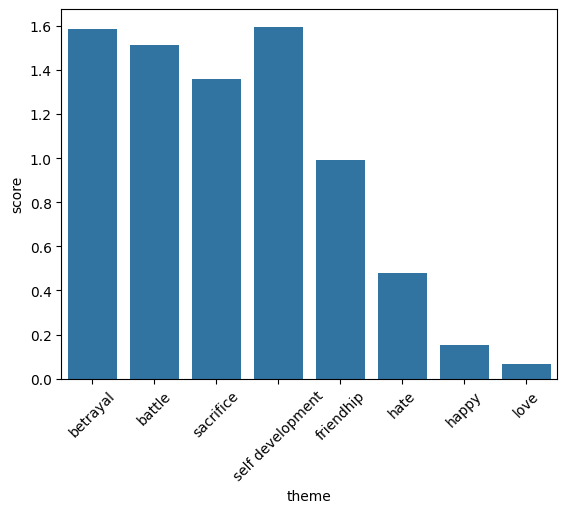

In [100]:
sns.barplot(data=theme_output, x='theme',y='score')
plt.xticks(rotation=45)
plt.show()